In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
import joblib
import os


In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()



Saving Final preprocessed data.csv to Final preprocessed data.csv


,pl_rade,pl_masse,pl_orbper,pl_orbsmax,pl_eqt,pl_dens,st_teff,st_lum,st_met,habitable
0,-0.036335,-0.113896,-0.005487,-0.019109,-0.127375,-0.019457,-0.258966,-0.799577,0.064576,0
1,-0.036335,-0.113896,-0.005461,-0.018303,-0.127375,-0.019457,-2.323166,-5.016690,0.064576,0
2,-0.036335,-0.113896,-0.005490,-0.019109,-0.127375,-0.019457,0.144601,0.045652,0.064576,0
3,-0.053925,-0.113896,-0.005487,-0.019299,0.200447,-0.019457,0.397489,0.045652,-0.467604,0
4,-0.036335,4.137758,-0.005486,0.097611,-0.127375,-0.019457,0.144601,0.045652,0.064576,0


In [ ]:
X = df.drop('habitable', axis=1)
y = df['habitable']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [ ]:
dt_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42))
])

dt_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [ ]:
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)




Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
xgb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBClassifier(
        eval_metric="logloss",
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{model_name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=model_name)



===== Logistic Regression =====
Accuracy : 0.99
Precision: 0.4
Recall   : 0.2222222222222222
F1-score : 0.2857142857142857
ROC-AUC  : 0.9903576634151812

Confusion Matrix:
 [[988   3]
 [  7   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       991
           1       0.40      0.22      0.29         9

    accuracy                           0.99      1000
   macro avg       0.70      0.61      0.64      1000
weighted avg       0.99      0.99      0.99      1000


===== Decision Tree =====
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0
ROC-AUC  : 1.0

Confusion Matrix:
 [[991   0]
 [  0   9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       991
           1       1.00      1.00      1.00         9

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted 

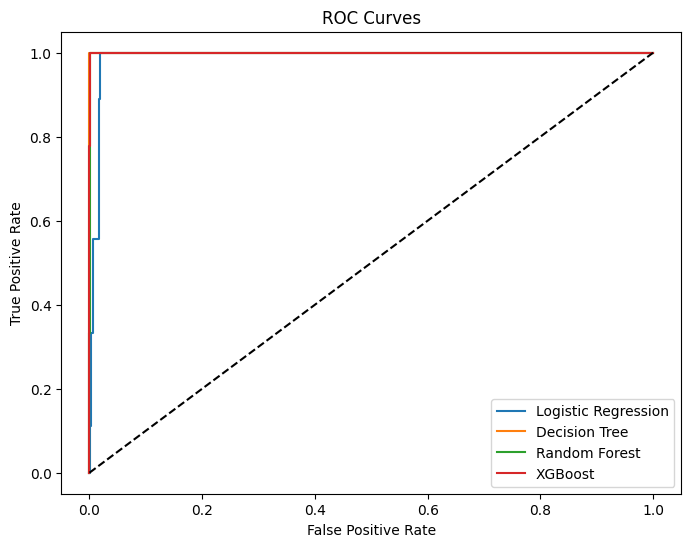

In [ ]:
plt.figure(figsize=(8,6))

evaluate_model(lr_pipeline, X_test, y_test, "Logistic Regression")
evaluate_model(dt_pipeline, X_test, y_test, "Decision Tree")
evaluate_model(rf_pipeline, X_test, y_test, "Random Forest")
evaluate_model(xgb_pipeline, X_test, y_test, "XGBoost")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


In [ ]:
rf_params = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    rf_params,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_


In [ ]:
df["habitability_score"] = best_rf.predict_proba(X)[:, 1]

ranked_df = df.sort_values(
    by="habitability_score",
    ascending=False
)

os.makedirs("data/processed", exist_ok=True)
ranked_df.to_csv(
    "data/processed/habitability_ranked.csv",
    index=False
)

print(" Habitability ranking saved")


✅ Habitability ranking saved


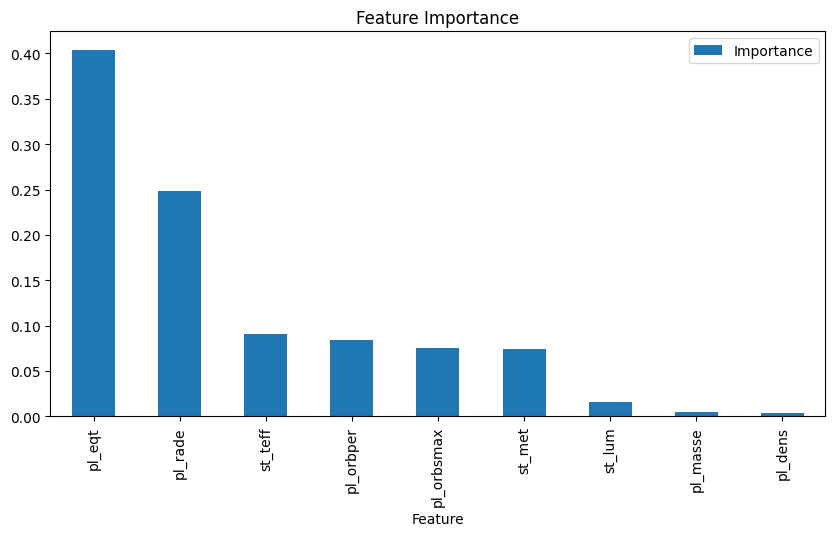

In [ ]:

importances = best_rf.named_steps["model"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.plot(
    x="Feature",
    y="Importance",
    kind="bar",
    figsize=(10,5),
    title="Feature Importance"
)

plt.show()
